In [1]:
#EXERCISE 1

import os


import geopandas as gpd
from  fiona import listlayers

#maps
venezuelaMaps='https://github.com/enrique1157/geodfven/raw/main/maps/venezuelaMaps_24718.gpkg'

#layers in maps
listlayers(venezuelaMaps)

['countries', 'cities', 'rivers']

In [2]:
venezuela=gpd.read_file(venezuelaMaps,layer='countries')
venezuela_cities=gpd.read_file(venezuelaMaps,layer='cities')
venezuela_rivers=gpd.read_file(venezuelaMaps,layer='rivers')

In [3]:
# Verificamos que tengan el mismos CRS
venezuela.crs.to_epsg()==venezuela_cities.crs.to_epsg()==venezuela_rivers.crs.to_epsg()

True

<Axes: >

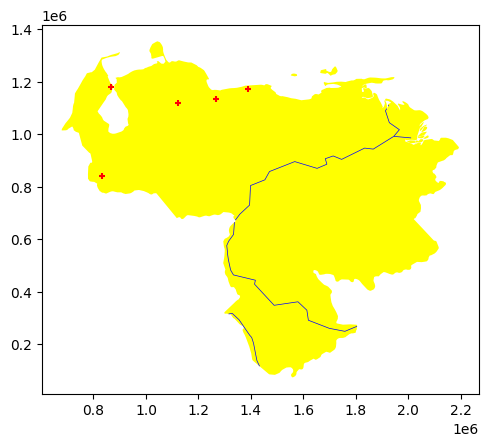

In [4]:
# plotting
base = venezuela.plot(facecolor="yellow")
venezuela_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
venezuela_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [5]:
#Verificar si mi pais seleccionado es un poligono o multipoligono
venezuela

COUNTRY                                           geometry
0  Venezuela  MULTIPOLYGON (((2142796.081 905620.537, 213589...

In [6]:
venezuela.boundary

0    MULTILINESTRING ((2142796.081 905620.537, 2135...
dtype: geometry

<Axes: >

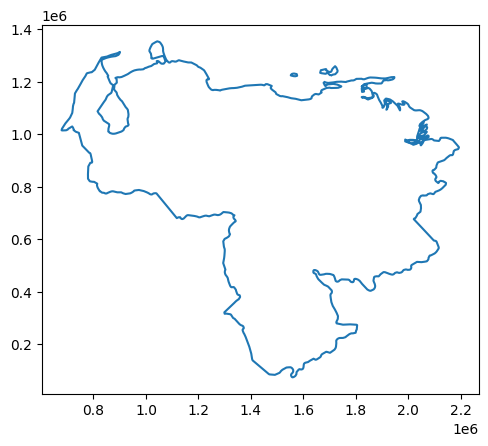

In [7]:
#Recupero las fronteras del pais
venezuela.boundary.plot()

In [8]:
type(venezuela.boundary)

geopandas.geoseries.GeoSeries

In [9]:
venezuela.boundary.to_frame()

0
0  MULTILINESTRING ((2142796.081 905620.537, 2135...

In [10]:
# conversion
venezuela_border=venezuela.boundary.to_frame() 

# new column (optional)
venezuela_border['name']='Venezuela' 

# renaming the geometry column
venezuela_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
venezuela_border = venezuela_border.set_geometry("geometry")

# verifying:
venezuela_border.crs

<Projected CRS: EPSG:24718>
Name: La Canoa / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Venezuela - west of 72°W.
- bounds: (-73.38, 7.02, -71.99, 11.62)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: La Canoa
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [11]:
venezuela_border

geometry       name
0  MULTILINESTRING ((2142796.081 905620.537, 2135...  Venezuela

In [12]:
#EXERCISE 2

In [13]:
venezuela_states=gpd.read_file(os.path.join("maps","ven_adm_ibge_20210223_shp","ven_admbnda_adm1_ine_20210223.shp"))
venezuela_municipalities=gpd.read_file(os.path.join("maps","ven_adm_ibge_20210223_shp","ven_admbnda_adm2_ine_20210223.shp"))

In [14]:
venezuela_states.crs, venezuela_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

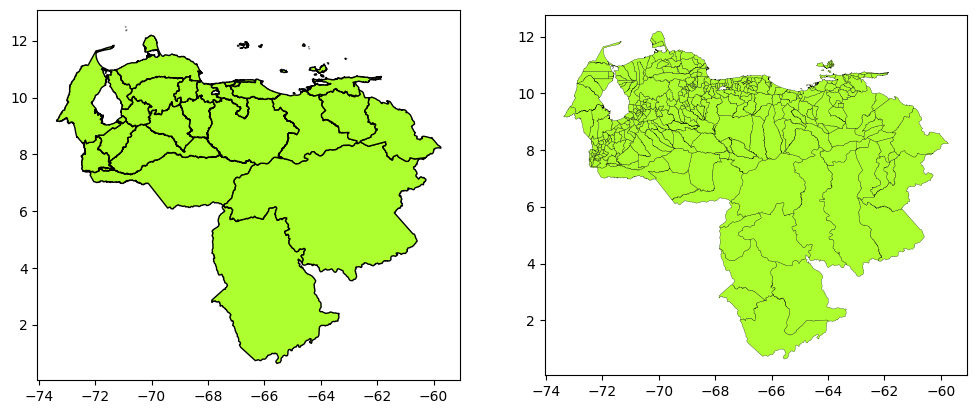

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

venezuela_states.plot(ax=ax1, facecolor='greenyellow', edgecolor='black')
venezuela_municipalities.plot(ax=ax2, facecolor='greenyellow', edgecolor='black',linewidth=0.2)

In [16]:
#brazil_states.to_crs(5641)

In [17]:
venezuela_states.geometry.head()

0    POLYGON ((-67.43503 6.18680, -67.43404 6.18646...
1    MULTIPOLYGON (((-64.93242 10.15568, -64.92978 ...
2    POLYGON ((-69.41598 8.06711, -69.41524 8.06577...
3    POLYGON ((-67.46227 10.53280, -67.46107 10.531...
4    POLYGON ((-70.21778 9.05402, -70.21484 9.05299...
Name: geometry, dtype: geometry

In [18]:
venezuela_states.crs = "EPSG:4326"
venezuela_municipalities.crs = "EPSG:4326"

In [19]:
venezuela_states=venezuela_states.to_crs(24718)
venezuela_municipalities=venezuela_municipalities.to_crs(24718)

In [20]:
#EXERCISE 3

In [21]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","ve-airports.csv"))

# see

infoairports

id        ident                 type  \
0    #meta +id  #meta +code  #loc +airport +type   
1         6300         SVMI        large_airport   
2         6299         SVMG       medium_airport   
3         6255         SVBC        large_airport   
4         6297         SVMC       medium_airport   
..         ...          ...                  ...   
597      40374      VE-0025             heliport   
598      40490      VE-0141             heliport   
599      40536      VE-0187             heliport   
600      40355      VE-0006             heliport   
601      40512      VE-0163             heliport   

                                                  name        latitude_deg  \
0                                  #loc +airport +name           #geo +lat   
1                  Simón Bolívar International Airport           10.601194   
2     Del Caribe Santiago Mariño International Airport  10.912603378295898   
3    General José Antonio Anzoategui International ...           10.111111   
4                     La Chinita International Airport       10.5582084656   
..                                                 ...                 ...   
597                                     Buja  Heliport   9.583333015441895   
598                               Motatan II  Heliport    9.62166690826416   
599                                Temblador  Heliport   9.033332824707031   
600                     Aeroservicios Ranger  Heliport   7.300556182861328   
601                                 Protinal  Heliport   10.18166732788086   

           longitude_deg         elevation_ft                 continent  \
0              #geo +lon  #geo +elevation +ft  #region +continent +code   
1             -66.991222                  234                        SA   
2     -63.96659851074219                   74                        SA   
3             -64.692222                   30                        SA   
4         -71.7278594971                  239                        SA   
..                   ...                  ...                       ...   
597  -62.654998779296875                   43                        SA   
598   -70.80833435058594                   98                        SA   
599   -62.53333282470703                  150                        SA   
600   -61.50138854980469                  525                        SA   
601   -67.97666931152344                 1487                        SA   

       country_name           iso_country  ...              municipality  \
0    #country +name  #country +code +iso2  ...  #loc +municipality +name   
1         Venezuela                    VE  ...                   Caracas   
2         Venezuela                    VE  ...            Isla Margarita   
3         Venezuela                    VE  ...                 Barcelona   
4         Venezuela                    VE  ...                 Maracaibo   
..              ...                   ...  ...                       ...   
597       Venezuela                    VE  ...          San José de Buja   
598       Venezuela                    VE  ...              Santa Isabel   
599       Venezuela                    VE  ...                 Temblador   
600       Venezuela                    VE  ...                  Tumeremo   
601       Venezuela                    VE  ...                  Valencia   

      scheduled_service                  gps_code                  iata_code  \
0    #status +scheduled  #loc +airport +code +gps  #loc +airport +code +iata   
1                     1                      SVMI                        CCS   
2                     1                      SVMG                        PMV   
3                     1                      SVBC                        BLA   
4                     1                      SVMC                        MAR   
..                  ...                       ...                        ...   
597                   0                       NaN                        NaN

In [22]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           601 non-null    object
 1   type           601 non-null    object
 2   latitude_deg   601 non-null    object
 3   longitude_deg  601 non-null    object
 4   elevation_ft   593 non-null    object
 5   region_name    601 non-null    object
 6   municipality   209 non-null    object
dtypes: object(7)
memory usage: 33.0+ KB


In [23]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           601 non-null    object 
 1   type           601 non-null    object 
 2   latitude_deg   601 non-null    float64
 3   longitude_deg  601 non-null    float64
 4   elevation_ft   593 non-null    float64
 5   region_name    601 non-null    object 
 6   municipality   209 non-null    object 
dtypes: float64(3), object(4)
memory usage: 33.0+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

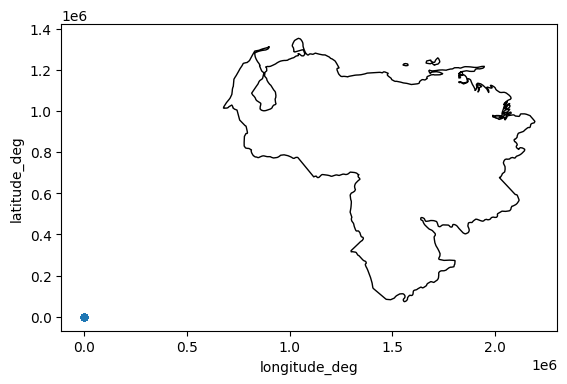

In [24]:
# let's plot

base = venezuela.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [25]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)# the coordinates were in degrees - unprojected

In [26]:
airports=airports.to_crs(24718)

<Axes: >

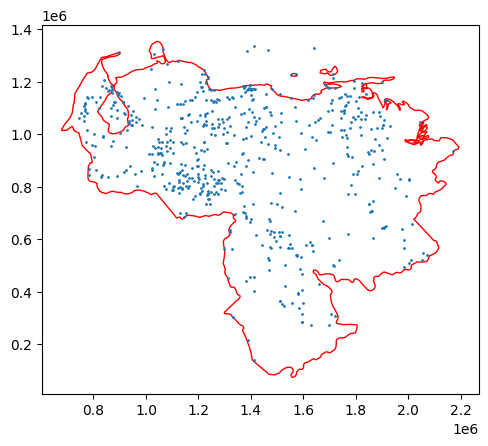

In [27]:
# let's plot

base = venezuela.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [28]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [29]:
airports['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     454
heliport           88
medium_airport     46
closed             11
large_airport       2
Name: count, dtype: int64

In [30]:
airports.rename(columns={'type':'kind'},inplace=True)

In [31]:
from folium import LayerControl


m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
#m = airports[airports.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [32]:
#EXERCISE 4

In [33]:
centroVenezuela=venezuela.centroid
centroVenezuela

0    POINT (1486159.886 795313.113)
dtype: geometry

In [34]:
type(centroVenezuela), type(centroVenezuela.x)

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [35]:
type(centroVenezuela.x[0]),type(centroVenezuela.y[0])

(numpy.float64, numpy.float64)

<Axes: title={'center': 'Below_Centroid'}>

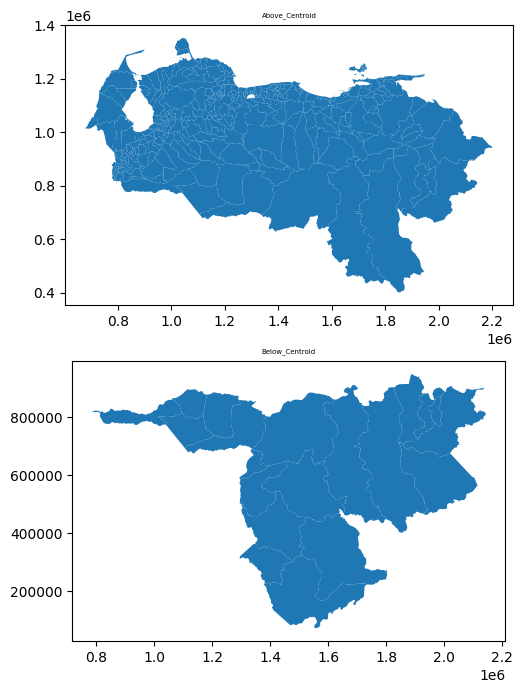

In [36]:
fig, axs = plt.subplots(nrows=2,ncols=1,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroVenezuela.x[0]
centroidY=centroVenezuela.y[0]

axs[0].set_title('Above_Centroid',fontsize=5)
venezuela_municipalities.cx[:,centroidY:].plot(ax=axs[0]) 

axs[1].set_title('Below_Centroid',fontsize=5)
venezuela_municipalities.cx[:,:centroidY].plot(ax=axs[1]) 



In [37]:
#TENEMOS NORTE (ARRIBA) EN DOS CASOS: ARRIBA A LA DERECHA Y ARRIBA A LA IZQUIERDA
#EN SUR (ABAJO) HAY DOS CASOS: ABAJO A LA DERECHA Y ABAJO A LA IZQUIERDA
#municipalities_leftUp=venezuela_municipalities.cx[:centroidX,centroidY:]
#municipalities_rightUp=venezuela_municipalities.cx[centroidX:,centroidY:]
#municipalities_leftDown=venezuela_municipalities.cx[:centroidX,:centroidY]
#municipalities_rightDown=venezuela_municipalities.cx[centroidX:,:centroidY]


In [38]:
#municipalities_leftUp.overlay(municipalities_rightUp,how="union",keep_geom_type=True)

In [39]:
# appending
#pd.concat([municipalities_leftUp,(municipalities_rightUp],ignore_index=True)

In [40]:
#municipalities_north=municipalities_leftUp.dissolve().overlay(municipalities_rightUp.dissolve(), how="union",keep_geom_type=True).dissolve()

In [41]:
#EN EL SUR
#municipalities_leftDown.overlay(municipalities_rightDown,how="union",keep_geom_type=True)

In [42]:
#pd.concat([municipalities_leftDown,municipalities_rightDown],ignore_index=True)

In [43]:
#municipalities_south=municipalities_leftDown.dissolve().overlay(municipalities_rightDown.dissolve(), how="union",keep_geom_type=True).dissolve()


In [44]:
#fig, axs = plt.subplots(nrows=2,ncols=1,sharex=False, sharey=False,figsize=(8,8))

#centroidX=centroVenezuela.x[0]
#centroidY=centroVenezuela.y[0]

#axs[0].set_title('Above_Centroid',fontsize=5)
#venezuela_municipalities.cx[:,centroidY:].plot(ax=axs[0]) 

#axs[1].set_title('Below_Centroid',fontsize=5)
#municipalities.cx[:,:centroidY].plot(ax=axs[1]) 

In [45]:
#instead of:
venezuela_municipalities.cx[:centroidX,centroidY:]

Shape_Leng  Shape_Area          ADM2_ES ADM2_PCODE ADM2_REF ADM2ALT1ES  \
0      2.246914    0.169500          Acevedo     VE1501     None       None   
1      5.362333    1.141787         Achaguas     VE0401     None       None   
2      1.518953    0.069202           Acosta     VE1101     None       None   
4      0.712712    0.018854      Agua Blanca     VE1801     None       None   
6      1.400908    0.054940  Alberto Adriani     VE1401     None       None   
..          ...         ...              ...        ...      ...        ...   
329    3.113079    0.096648           Vargas     VE2401     None       None   
330    1.710749    0.079955           Veroes     VE2214     None       None   
332    1.351287    0.060429           Zamora     VE1125     None       None   
333    0.998225    0.037070           Zamora     VE1521     None       None   
334    0.643220    0.010810              Zea     VE1423     None       None   

    ADM2ALT2ES     ADM1_ES ADM1_PCODE                             ADM0_EN  \
0         None     Miranda       VE15  Venezuela (Bolivarian Republic of)   
1         None       Apure       VE04  Venezuela (Bolivarian Republic of)   
2         None      Falcón       VE11  Venezuela (Bolivarian Republic of)   
4         None  Portuguesa       VE18  Venezuela (Bolivarian Republic of)   
6         None      Mérida       VE14  Venezuela (Bolivarian Republic of)   
..         ...         ...        ...                                 ...   
329       None   La Guaira       VE24  Venezuela (Bolivarian Republic of)   
330       None     Yaracuy       VE22  Venezuela (Bolivarian Republic of)   
332       None      Falcón       VE11  Venezuela (Bolivarian Republic of)   
333       None     Miranda       VE15  Venezuela (Bolivarian Republic of)   
334       None      Mérida       VE14  Venezuela (Bolivarian Republic of)   

                                  ADM0_ES ADM0_PCODE        date     validOn  \
0    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
1    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
2    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
4    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
6    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
..                                    ...        ...         ...         ...   
329  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
330  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
332  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
333  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
334  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   

    validTo                                           geometry  
0      None  POLYGON ((1451801.271 1177162.816, 1451931.093...  
1      None  POLYGON ((1206857.699 885710.710, 1206926.971 ...  
2      None  POLYGON ((1188191.216 1261541.565, 1188455.243...  
4      None  POLYGON ((1151215.778 1076730.775, 1154304.629...  
6      None  POLYGON ((875696.659 968767.254, 876012.301 96...  
..      ...                                                ...  
329    None  POLYGON ((1434261.984 1188440.325, 1434404.444...  
330    None  POLYGON ((1202338.067 1179915.366, 1202466.601...  
332    None  POLYGON ((1123505.509 1277268.653, 1123812.505...  
333    None  POLYGON ((1427483.774 1178846.630, 1427735.735...  
334    None  POLYGON ((855660.943 946309.902, 855736.477 94...  

[248 rows x 16 columns]

In [46]:
# dissolving
venezuela_municipalities.cx[:centroidX,centroidY:].dissolve()

geometry  Shape_Leng  Shape_Area  \
0  MULTIPOLYGON (((785442.583 819257.279, 785386....    2.246914      0.1695   

   ADM2_ES ADM2_PCODE      ADM2_REF ADM2ALT1ES ADM2ALT2ES  ADM1_ES ADM1_PCODE  \
0  Acevedo     VE1501  Andres Bello     Zamora       None  Miranda       VE15   

                              ADM0_EN                               ADM0_ES  \
0  Venezuela (Bolivarian Republic of)  Venezuela (República Bolivariana de)   

  ADM0_PCODE        date     validOn validTo  
0         VE  2018-05-02  2021-02-23    None

In [47]:
type(venezuela_municipalities.cx[:centroidX,centroidY:].dissolve())

geopandas.geodataframe.GeoDataFrame

<Axes: >

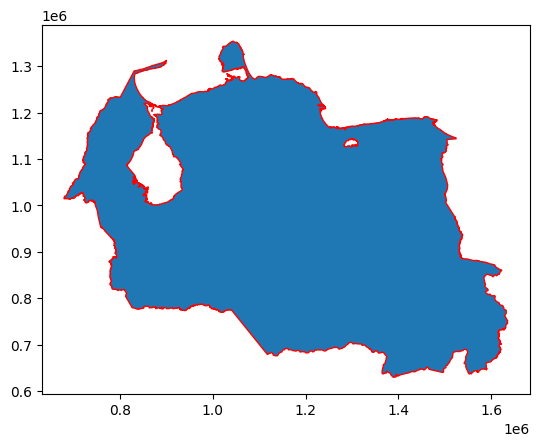

In [48]:
venezuela_municipalities.cx[:centroidX,centroidY:].dissolve().plot(edgecolor='red')

<Axes: >

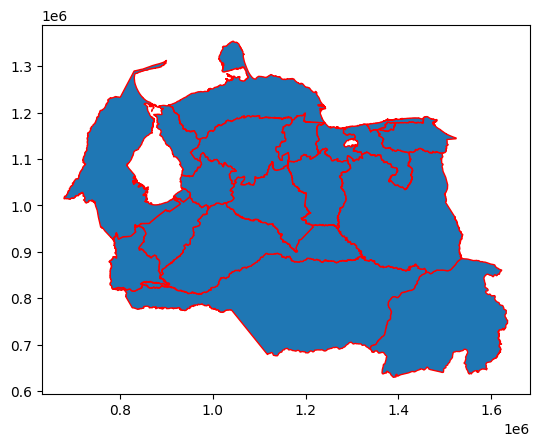

In [49]:
# the municipalities by state
venezuela_municipalities.cx[:centroidX,centroidY:].dissolve(by='ADM1_ES').plot(edgecolor='red')

In [50]:
#UNARY UNION

In [51]:
venezuela_municipalities.cx[:centroidX,centroidY:].unary_union

In [52]:
type(venezuela_municipalities.cx[:centroidX,centroidY:].unary_union)

shapely.geometry.multipolygon.MultiPolygon

In [53]:
gpd.GeoDataFrame(index=[0],
                 crs=venezuela_municipalities.crs,
                 geometry=[venezuela_municipalities.cx[:centroidX,centroidY:].unary_union])

geometry
0  MULTIPOLYGON (((785442.583 819257.279, 785386....

In [54]:
# you create
Venezuela_topLeft=venezuela_municipalities.cx[:centroidX,centroidY:].dissolve()
# you get
Venezuela_topLeft

geometry  Shape_Leng  Shape_Area  \
0  MULTIPOLYGON (((785442.583 819257.279, 785386....    2.246914      0.1695   

   ADM2_ES ADM2_PCODE      ADM2_REF ADM2ALT1ES ADM2ALT2ES  ADM1_ES ADM1_PCODE  \
0  Acevedo     VE1501  Andres Bello     Zamora       None  Miranda       VE15   

                              ADM0_EN                               ADM0_ES  \
0  Venezuela (Bolivarian Republic of)  Venezuela (República Bolivariana de)   

  ADM0_PCODE        date     validOn validTo  
0         VE  2018-05-02  2021-02-23    None

In [55]:
Venezuela_topLeft['zone']='NW' # add column
Venezuela_topLeft=Venezuela_topLeft.loc[:,['ADM0_EN','zone','geometry']]   # keep some

# result
Venezuela_topLeft

ADM0_EN zone  \
0  Venezuela (Bolivarian Republic of)   NW   

                                            geometry  
0  MULTIPOLYGON (((785442.583 819257.279, 785386....

In [56]:
Venezuela_topRight=venezuela_municipalities.cx[centroidX:,centroidY:].dissolve()
Venezuela_bottomLeft=venezuela_municipalities.cx[:centroidX,:centroidY].dissolve()
Venezuela_bottomRight=venezuela_municipalities.cx[centroidX:,:centroidY].dissolve()

Venezuela_topRight['zone']='NE'
Venezuela_topRight=Venezuela_topRight.loc[:,['ADM0_EN','zone','geometry']] 

Venezuela_bottomLeft['zone']='NE'
Venezuela_bottomLeft=Venezuela_bottomLeft.loc[:,['ADM0_EN','zone','geometry']] 

Venezuela_bottomRight['zone']='NE'
Venezuela_bottomRight=Venezuela_bottomRight.loc[:,['ADM0_EN','zone','geometry']] 

In [57]:
venezuela_municipalities

Shape_Leng  Shape_Area      ADM2_ES ADM2_PCODE ADM2_REF ADM2ALT1ES  \
0      2.246914    0.169500      Acevedo     VE1501     None       None   
1      5.362333    1.141787     Achaguas     VE0401     None       None   
2      1.518953    0.069202       Acosta     VE1101     None       None   
3      1.039919    0.038421       Acosta     VE1601     None       None   
4      0.712712    0.018854  Agua Blanca     VE1801     None       None   
..          ...         ...          ...        ...      ...        ...   
330    1.710749    0.079955       Veroes     VE2214     None       None   
331    0.377952    0.004591     Villalba     VE1711     None       None   
332    1.351287    0.060429       Zamora     VE1125     None       None   
333    0.998225    0.037070       Zamora     VE1521     None       None   
334    0.643220    0.010810          Zea     VE1423     None       None   

    ADM2ALT2ES        ADM1_ES ADM1_PCODE                             ADM0_EN  \
0         None        Miranda       VE15  Venezuela (Bolivarian Republic of)   
1         None          Apure       VE04  Venezuela (Bolivarian Republic of)   
2         None         Falcón       VE11  Venezuela (Bolivarian Republic of)   
3         None        Monagas       VE16  Venezuela (Bolivarian Republic of)   
4         None     Portuguesa       VE18  Venezuela (Bolivarian Republic of)   
..         ...            ...        ...                                 ...   
330       None        Yaracuy       VE22  Venezuela (Bolivarian Republic of)   
331       None  Nueva Esparta       VE17  Venezuela (Bolivarian Republic of)   
332       None         Falcón       VE11  Venezuela (Bolivarian Republic of)   
333       None        Miranda       VE15  Venezuela (Bolivarian Republic of)   
334       None         Mérida       VE14  Venezuela (Bolivarian Republic of)   

                                  ADM0_ES ADM0_PCODE        date     validOn  \
0    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
1    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
2    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
3    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
4    Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
..                                    ...        ...         ...         ...   
330  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
331  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
332  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
333  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   
334  Venezuela (República Bolivariana de)         VE  2018-05-02  2021-02-23   

    validTo                                           geometry  
0      None  POLYGON ((1451801.271 1177162.816, 1451931.093...  
1      None  POLYGON ((1206857.699 885710.710, 1206926.971 ...  
2      None  POLYGON ((1188191.216 1261541.565, 1188455.243...  
3      None  POLYGON ((1753284.742 1151948.209, 1753588.550...  
4      None  POLYGON ((1151215.778 1076730.775, 1154304.629...  
..      ...                                                ...  
330    None  POLYGON ((1202338.067 1179915.366, 1202466.601...  
331    None  POLYGON ((1710387.579 1217245.203, 1710485.510...  
332    None  POLYGON ((1123505.509 1277268.653, 1123812.505...  
333    None  POLYGON ((1427483.774 1178846.630, 1427735.735...  
334    None  POLYGON ((855660.943 946309.902, 855736.477 94...  

[335 rows x 16 columns]

In [58]:
# tuple with count of rows
rowsCX=(venezuela_municipalities.cx[:centroVenezuela.x[0],centroVenezuela.y[0]:].shape[0],\
        venezuela_municipalities.cx[centroVenezuela.x[0]:,centroVenezuela.y[0]:].shape[0],\
        venezuela_municipalities.cx[:centroVenezuela.x[0],:centroVenezuela.y[0]].shape[0],\
        venezuela_municipalities.cx[centroVenezuela.x[0]:,:centroVenezuela.y[0]].shape[0])

sum(rowsCX)

360

In [59]:
# coincidences:
len(set(venezuela_municipalities.cx[:centroVenezuela.x[0],centroVenezuela.y[0]:].ADM2_PCODE). \
intersection(set(venezuela_municipalities.cx[centroVenezuela.x[0]:,centroVenezuela.y[0]:].ADM2_PCODE)). \
intersection(set(venezuela_municipalities.cx[:centroVenezuela.x[0],:centroVenezuela.y[0]].ADM2_PCODE)). \
intersection(set(venezuela_municipalities.cx[centroVenezuela.x[0]:,:centroVenezuela.y[0]].ADM2_PCODE)))

1

In [60]:
#SUMANDO LAS FILAS OBTENEMOS MAS MUNICIPIOS

In [61]:
venezuela_municipalities.shape[0]

335

<Axes: >

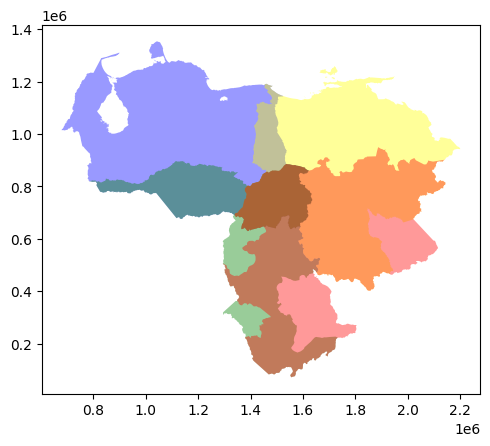

In [62]:
base=Venezuela_topLeft.plot(facecolor='blue', alpha=0.4)
Venezuela_topRight.plot(ax=base,facecolor='yellow', alpha=0.4)
Venezuela_bottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Venezuela_bottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [63]:
#EXERCISE 5

In [64]:
Venezuela_AirTopLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,centroidY:]
Venezuela_AirTopRight=airports[airports.kind=='medium_airport'].cx[centroidX:,centroidY:]
Venezuela_AirBottomLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,:centroidY]
Venezuela_AirBottomRight=airports[airports.kind=='medium_airport'].cx[centroidX:,:centroidY]

<Axes: >

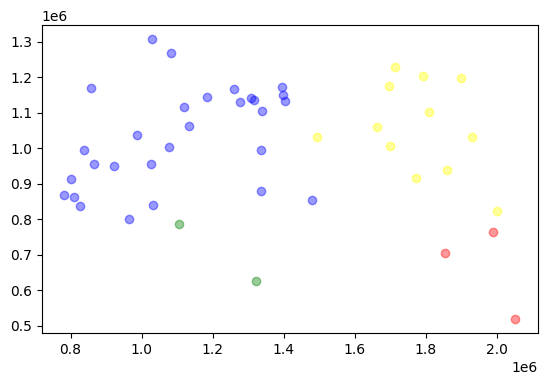

In [65]:
base=Venezuela_AirTopLeft.plot(facecolor='blue', alpha=0.4)
Venezuela_AirTopRight.plot(ax=base,facecolor='yellow', alpha=0.4)
Venezuela_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Venezuela_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [66]:
Venezuela_AirTopLeft

name            kind  \
3                 La Chinita International Airport  medium_airport   
4              Josefa Camejo International Airport  medium_airport   
6                       Alberto Carnevalli Airport  medium_airport   
7           Arturo Michelena International Airport  medium_airport   
10                  José Leonardo Chirinos Airport  medium_airport   
12                   Oscar Machado Zuluaga Airport  medium_airport   
14              Barquisimeto International Airport  medium_airport   
18                 San Antonio Del Tachira Airport  medium_airport   
19                                 Barinas Airport  medium_airport   
20                Juan Pablo Pérez Alfonso Airport  medium_airport   
21                           Metropolitano Airport  medium_airport   
22                               Paramillo Airport  medium_airport   
23                 Santa Bárbara del Zulia Airport  medium_airport   
25                   San Fernando De Apure Airport  medium_airport   
26     Generalissimo Francisco de Miranda Air Base  medium_airport   
31                  Oswaldo Guevara Mujica Airport  medium_airport   
33                  Escuela Mariscal Sucre Airport  medium_airport   
34  Mayor Buenaventura Vivas International Airport  medium_airport   
35             Dr. Antonio Nicolás Briceño Airport  medium_airport   
37                              Guasdalito Airport  medium_airport   
38                           El Libertador Airbase  medium_airport   
39                     Caicara del Orinoco Airport  medium_airport   
42   General Bartolome Salom International Airport  medium_airport   
44                                 La Fria Airport  medium_airport   
45                                 Guanare Airport  medium_airport   
46                                Calabozo Airport  medium_airport   
47               Sub Teniente Nestor Arias Airport  medium_airport   
66                               Palmarito Airport  medium_airport   
67                  San Juan de Los Morros Airport  medium_airport   

    latitude_deg  longitude_deg  elevation_ft       region_name  \
3      10.558208     -71.727859         239.0       Zulia State   
4      11.780775     -70.151497          75.0      Falcón State   
6       8.582078     -71.161041        5007.0      Mérida State   
7      10.149733     -67.928398        1411.0    Carabobo State   
10     11.414944     -69.680901          52.0      Falcón State   
12     10.286111     -66.816109        2145.0     Miranda State   
14     10.042747     -69.358620        2042.0        Lara State   
18      7.840830     -72.439697        1312.0     Táchira State   
19      8.615000     -70.214167         615.0     Barinas State   
20      8.624139     -71.672668         250.0      Mérida State   
21     10.133169     -66.787827         574.0     Miranda State   
22      7.801320     -72.202904        3314.0     Táchira State   
23      8.974550     -71.943253          32.0       Zulia State   
25      7.883320     -67.444000         154.0       Apure State   
26     10.485033     -66.843513        2739.0     Miranda State   
31      9.553375     -69.237869         640.0  Portuguesa State   
33     10.249978     -67.649422        1338.0      Aragua State   
34      7.565380     -72.035103        1083.0     Táchira State   
35      9.340478     -70.584061        2060.0    Trujillo State   
37      7.233333     -70.800003         426.0       Apure State   
38     10.183375     -67.557320        1450.0      Aragua State   
39      7.625510     -66.162804         141.0     Bolívar State   
42     10.480500     -68.072998          32.0    Carabobo State   
44      8.239167     -72.271027         305.0     Táchira State   
45      9.026944     -69.755150         606.0  Portuguesa State   
46      8.924656     -67.417091         328.0     Guárico State   
47     10.278700     -68.755203         761.0     Yaracuy State   
66      7.566670     -70.183296         347.0       Apure State   
67

<Axes: >

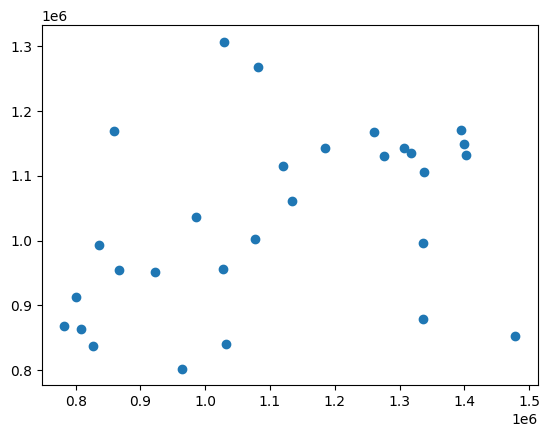

In [67]:
Venezuela_AirTopLeft.convex_hull.plot()

<Axes: >

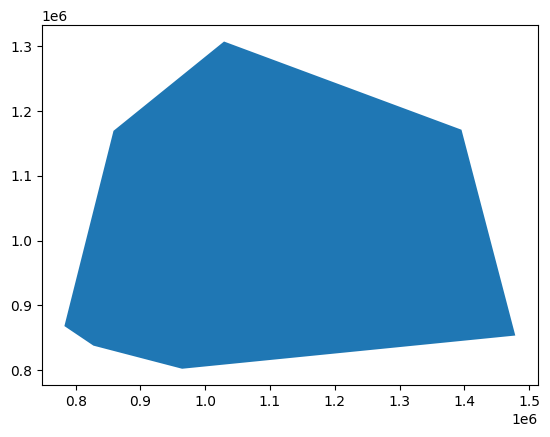

In [68]:
Venezuela_AirTopLeft.dissolve().convex_hull.plot()

In [69]:
Venezuela_AirTopLeft.dissolve().convex_hull

0    POLYGON ((964296.426 802055.006, 827438.218 83...
dtype: geometry

<Axes: >

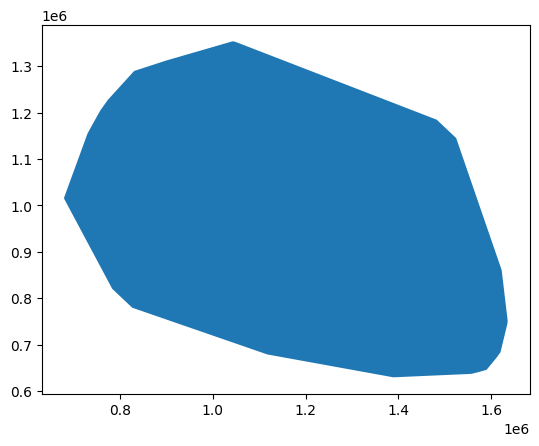

In [70]:
# SW of Venezuela as convex hull
Venezuela_topLeft.convex_hull.plot()

<Axes: >

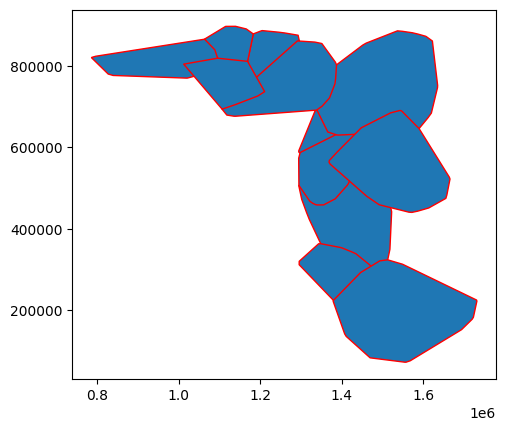

In [71]:
venezuela_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

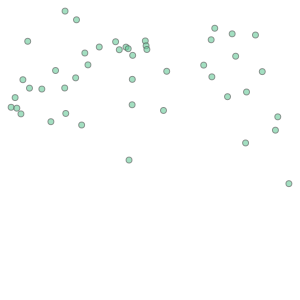

In [72]:
# just the union
medium_airport=airports[airports.kind=='medium_airport']
medium_airport.unary_union

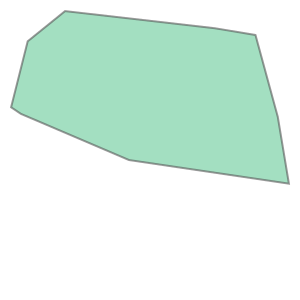

In [73]:
# hull of the union
medium_airport.unary_union.convex_hull

In [74]:
MediumAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=medium_airport.crs,
                                    geometry=[medium_airport.unary_union.convex_hull])
MediumAirport_hull['name']='medium airports hull' # optional

# then

MediumAirport_hull

geometry                  name
0  POLYGON ((2051656.592 518961.434, 1321315.443 ...  medium airports hull

<Axes: >

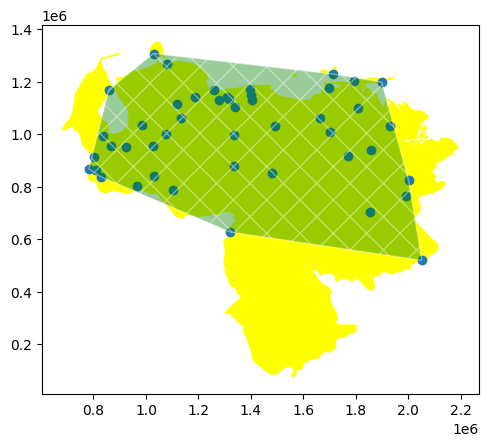

In [75]:
base=venezuela.plot(facecolor='yellow')
medium_airport.plot(ax=base)
MediumAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [76]:
#EXERCISE 6

In [77]:
# El Norte
MunisN_venezuela=venezuela_municipalities.cx[:,centroidY:]
# El Sur
MunisS_venezuela=venezuela_municipalities.cx[:,:centroidY]
# El Oeste
MunisW_venezuela=venezuela_municipalities.cx[:centroidX,:]
# El Este
MunisE_venezuela=venezuela_municipalities.cx[centroidX:,:]

In [78]:
munisMidNS_venezuela=MunisN_venezuela.overlay(MunisS_venezuela, how="intersection",keep_geom_type=True)
munisMidNS_venezuela

Shape_Leng_1  Shape_Area_1              ADM2_ES_1 ADM2_PCODE_1  \
0       5.362333      1.141787               Achaguas       VE0401   
1       3.454143      0.636979                  Muñoz       VE0403   
2       9.805720      1.714478           Pedro Camejo       VE0405   
3       5.735208      0.972813        Rómulo Gallegos       VE0406   
4       9.046159      0.989474                   Páez       VE0404   
5      14.536129      4.694351  Bolivariano Angostura       VE0707   
6       6.955693      1.203361                   Piar       VE0706   
7      15.963135      4.008204                  Sucre       VE0710   
8       6.400507      0.504800                 Roscio       VE0708   
9      11.706264      2.182846               Sifontes       VE0709   
10     11.235397      3.910626                 Cedeño       VE0702   
11      2.830917      0.217355              El Callao       VE0703   

         ADM2_REF_1 ADM2ALT1ES_1 ADM2ALT2ES_1 ADM1_ES_1 ADM1_PCODE_1  \
0              None         None         None     Apure         VE04   
1             Munoz         None         None     Apure         VE04   
2              None         None         None     Apure         VE04   
3   Romulo Gallegos         None         None     Apure         VE04   
4              Paez         None         None     Apure         VE04   
5              None         None         None   Bolívar         VE07   
6              None         None         None   Bolívar         VE07   
7              None         None         None   Bolívar         VE07   
8              None         None         None   Bolívar         VE07   
9              None         None         None   Bolívar         VE07   
10           Cedeno         None         None   Bolívar         VE07   
11             None         None         None   Bolívar         VE07   

                             ADM0_EN_1  ... ADM2ALT2ES_2 ADM1_ES_2  \
0   Venezuela (Bolivarian Republic of)  ...         None     Apure   
1   Venezuela (Bolivarian Republic of)  ...         None     Apure   
2   Venezuela (Bolivarian Republic of)  ...         None     Apure   
3   Venezuela (Bolivarian Republic of)  ...         None     Apure   
4   Venezuela (Bolivarian Republic of)  ...         None     Apure   
5   Venezuela (Bolivarian Republic of)  ...         None   Bolívar   
6   Venezuela (Bolivarian Republic of)  ...         None   Bolívar   
7   Venezuela (Bolivarian Republic of)  ...         None   Bolívar   
8   Venezuela (Bolivarian Republic of)  ...         None   Bolívar   
9   Venezuela (Bolivarian Republic of)  ...         None   Bolívar   
10  Venezuela (Bolivarian Republic of)  ...         None   Bolívar   
11  Venezuela (Bolivarian Republic of)  ...         None   Bolívar   

   ADM1_PCODE_2                           ADM0_EN_2  \
0          VE04  Venezuela (Bolivarian Republic of)   
1          VE04  Venezuela (Bolivarian Republic of)   
2          VE04  Venezuela (Bolivarian Republic of)   
3          VE04  Venezuela (Bolivarian Republic of)   
4          VE04  Venezuela (Bolivarian Republic of)   
5          VE07  Venezuela (Bolivarian Republic of)   
6          VE07  Venezuela (Bolivarian Republic of)   
7          VE07  Venezuela (Bolivarian Republic of)   
8          VE07  Venezuela (Bolivarian Republic of)   
9          VE07  Venezuela (Bolivarian Republic of)   
10         VE07  Venezuela (Bolivarian Republic of)   
11         VE07  Venezuela (Bolivarian Republic of)   

                               ADM0_ES_2  ADM0_PCODE_2      date_2  \
0   Venezuela (República Bolivariana de)            VE  2018-05-02   
1   Venezuela (República Bolivariana de)            VE  2018-05-02   
2   Venezuela (República Bolivariana de)            VE  2018-05-02   
3   Venezuela (República Bolivariana de)            VE  2018-05-02   
4   Venezuela (República Bolivariana de)            VE  2018-05-02   
5   Venezuela (República Bolivariana de)            VE  2018-05-02   
6   Venezuela (República Bolivariana de

In [79]:
MunisN_venezuela.sjoin(MunisS_venezuela, how="inner", predicate='contains')

Shape_Leng_left  Shape_Area_left           ADM2_ES_left ADM2_PCODE_left  \
1           5.362333         1.141787               Achaguas          VE0401   
56         14.536129         4.694351  Bolivariano Angostura          VE0707   
80         11.235397         3.910626                 Cedeño          VE0702   
97          2.830917         0.217355              El Callao          VE0703   
206         3.454143         0.636979                  Muñoz          VE0403   
216         9.046159         0.989474                   Páez          VE0404   
229         9.805720         1.714478           Pedro Camejo          VE0405   
236         6.955693         1.203361                   Piar          VE0706   
251         5.735208         0.972813        Rómulo Gallegos          VE0406   
254         6.400507         0.504800                 Roscio          VE0708   
282        11.706264         2.182846               Sifontes          VE0709   
294        15.963135         4.008204                  Sucre          VE0710   

       ADM2_REF_left ADM2ALT1ES_left ADM2ALT2ES_left ADM1_ES_left  \
1               None            None            None        Apure   
56              None            None            None      Bolívar   
80            Cedeno            None            None      Bolívar   
97              None            None            None      Bolívar   
206            Munoz            None            None        Apure   
216             Paez            None            None        Apure   
229             None            None            None        Apure   
236             None            None            None      Bolívar   
251  Romulo Gallegos            None            None        Apure   
254             None            None            None      Bolívar   
282             None            None            None      Bolívar   
294             None            None            None      Bolívar   

    ADM1_PCODE_left                        ADM0_EN_left  ... ADM2ALT1ES_right  \
1              VE04  Venezuela (Bolivarian Republic of)  ...             None   
56             VE07  Venezuela (Bolivarian Republic of)  ...             None   
80             VE07  Venezuela (Bolivarian Republic of)  ...             None   
97             VE07  Venezuela (Bolivarian Republic of)  ...             None   
206            VE04  Venezuela (Bolivarian Republic of)  ...             None   
216            VE04  Venezuela (Bolivarian Republic of)  ...             None   
229            VE04  Venezuela (Bolivarian Republic of)  ...             None   
236            VE07  Venezuela (Bolivarian Republic of)  ...             None   
251            VE04  Venezuela (Bolivarian Republic of)  ...             None   
254            VE07  Venezuela (Bolivarian Republic of)  ...             None   
282            VE07  Venezuela (Bolivarian Republic of)  ...             None   
294            VE07  Venezuela (Bolivarian Republic of)  ...             None   

    ADM2ALT2ES_right ADM1_ES_right ADM1_PCODE_right  \
1               None         Apure             VE04   
56              None       Bolívar             VE07   
80              None       Bolívar             VE07   
97              None       Bolívar             VE07   
206             None         Apure             VE04   
216             None         Apure             VE04   
229             None         Apure             VE04   
236             None       Bolívar             VE07   
251             None         Apure             VE04   
254             None       Bolívar             VE07   
282             None       Bolívar             VE07   
294             None       Bolívar             VE07   

                          ADM0_EN_right                         ADM0_ES_right  \
1    Venezuela (Bolivarian Republic of)  Venezuela (República Bolivariana de)   
56   Venezuela (Bolivarian Republic of)  Venezuela (República Bolivariana de)   
80   Venezuela (Bolivarian Republic of)  Venezuela (R

<Axes: >

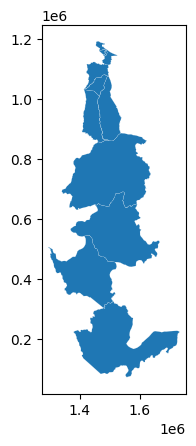

In [80]:
# keeping the overlay
munisMidWE_venezuela=MunisW_venezuela.overlay(MunisE_venezuela, how="intersection",keep_geom_type=True)
munisMidWE_venezuela.plot(edgecolor='white',linewidth=0.1)

In [81]:
#UNION


In [82]:
munisMidNS_venezuela.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Shape_Leng_1  12 non-null     float64 
 1   Shape_Area_1  12 non-null     float64 
 2   ADM2_ES_1     12 non-null     object  
 3   ADM2_PCODE_1  12 non-null     object  
 4   ADM2_REF_1    4 non-null      object  
 5   ADM2ALT1ES_1  0 non-null      object  
 6   ADM2ALT2ES_1  0 non-null      object  
 7   ADM1_ES_1     12 non-null     object  
 8   ADM1_PCODE_1  12 non-null     object  
 9   ADM0_EN_1     12 non-null     object  
 10  ADM0_ES_1     12 non-null     object  
 11  ADM0_PCODE_1  12 non-null     object  
 12  date_1        12 non-null     object  
 13  validOn_1     12 non-null     object  
 14  validTo_1     0 non-null      object  
 15  Shape_Leng_2  12 non-null     float64 
 16  Shape_Area_2  12 non-null     float64 
 17  ADM2_ES_2     12 non-null     object  
 18  ADM2

In [83]:
munisMidWE_venezuela.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Shape_Leng_1  12 non-null     float64 
 1   Shape_Area_1  12 non-null     float64 
 2   ADM2_ES_1     12 non-null     object  
 3   ADM2_PCODE_1  12 non-null     object  
 4   ADM2_REF_1    7 non-null      object  
 5   ADM2ALT1ES_1  1 non-null      object  
 6   ADM2ALT2ES_1  0 non-null      object  
 7   ADM1_ES_1     12 non-null     object  
 8   ADM1_PCODE_1  12 non-null     object  
 9   ADM0_EN_1     12 non-null     object  
 10  ADM0_ES_1     12 non-null     object  
 11  ADM0_PCODE_1  12 non-null     object  
 12  date_1        12 non-null     object  
 13  validOn_1     12 non-null     object  
 14  validTo_1     0 non-null      object  
 15  Shape_Leng_2  12 non-null     float64 
 16  Shape_Area_2  12 non-null     float64 
 17  ADM2_ES_2     12 non-null     object  
 18  ADM2

In [84]:
keep=['ADM0_EN_1','ADM1_ES_1','ADM2_ES_1','geometry']
munisMidNS_venezuela=munisMidNS_venezuela.loc[:,keep]
munisMidWE_venezuela=munisMidWE_venezuela.loc[:,keep]


In [85]:
# now 
munisMidNS_venezuela.overlay(munisMidWE_venezuela,how="union",keep_geom_type=True)

ADM0_EN_1_1 ADM1_ES_1_1            ADM2_ES_1_1  \
0   Venezuela (Bolivarian Republic of)     Bolívar                 Cedeño   
1   Venezuela (Bolivarian Republic of)       Apure               Achaguas   
2   Venezuela (Bolivarian Republic of)       Apure                  Muñoz   
3   Venezuela (Bolivarian Republic of)       Apure           Pedro Camejo   
4   Venezuela (Bolivarian Republic of)       Apure        Rómulo Gallegos   
5   Venezuela (Bolivarian Republic of)       Apure                   Páez   
6   Venezuela (Bolivarian Republic of)     Bolívar  Bolivariano Angostura   
7   Venezuela (Bolivarian Republic of)     Bolívar                   Piar   
8   Venezuela (Bolivarian Republic of)     Bolívar                  Sucre   
9   Venezuela (Bolivarian Republic of)     Bolívar                 Roscio   
10  Venezuela (Bolivarian Republic of)     Bolívar               Sifontes   
11  Venezuela (Bolivarian Republic of)     Bolívar              El Callao   
12                                 NaN         NaN                    NaN   
13                                 NaN         NaN                    NaN   
14                                 NaN         NaN                    NaN   
15                                 NaN         NaN                    NaN   
16                                 NaN         NaN                    NaN   
17                                 NaN         NaN                    NaN   
18                                 NaN         NaN                    NaN   
19                                 NaN         NaN                    NaN   
20                                 NaN         NaN                    NaN   
21                                 NaN         NaN                    NaN   
22                                 NaN         NaN                    NaN   

                           ADM0_EN_1_2 ADM1_ES_1_2         ADM2_ES_1_2  \
0   Venezuela (Bolivarian Republic of)     Bolívar              Cedeño   
1                                  NaN         NaN                 NaN   
2                                  NaN         NaN                 NaN   
3                                  NaN         NaN                 NaN   
4                                  NaN         NaN                 NaN   
5                                  NaN         NaN                 NaN   
6                                  NaN         NaN                 NaN   
7                                  NaN         NaN                 NaN   
8                                  NaN         NaN                 NaN   
9                                  NaN         NaN                 NaN   
10                                 NaN         NaN                 NaN   
11                                 NaN         NaN                 NaN   
12  Venezuela (Bolivarian Republic of)     Miranda        Andrés Bello   
13  Venezuela (Bolivarian Republic of)     Miranda               Brión   
14  Venezuela (Bolivarian Republic of)     Miranda               Buroz   
15  Venezuela (Bolivarian Republic of)     Guárico  José Tadeo Monagas   
16  Venezuela (Bolivarian Republic of)     Miranda                Páez   
17  Venezuela (Bolivarian Republic of)    Amazonas    Autónomo Atabapo   
18  Venezuela (Bolivarian Republic of)    Amazonas  Autónomo Rio Negro   
19  Venezuela (Bolivarian Republic of)    Amazonas           Manapiare   
20  Venezuela (Bolivarian Republic of)     Guárico        Las Mercedes   
21  Venezuela (Bolivarian Republic of)     Guárico    Leonardo Infante   
22  Venezuela (Bolivarian Republic of)     Guárico         Chaguaramas   

                                             geometry  
0   POLYGON ((1567050.724 881153.665, 1568246.820 ...  
1   POLYGON ((1206926.971 885706.669, 1207108.821 ...  
2   POLYGON ((1116513.194 896161.560, 1116722.943 ...  
3   POLYGON ((1293734.988 859693.810, 1293883.948 ...  
4   POLYGON ((1095861.948 817155.705, 1099122.115 ...  
5   POLYGON ((1073396.287 854449.602, 1077888.493 ...  
6   POLYG

In [86]:
# appending
pd.concat([munisMidNS_venezuela,munisMidWE_venezuela],ignore_index=True)

ADM0_EN_1 ADM1_ES_1              ADM2_ES_1  \
0   Venezuela (Bolivarian Republic of)     Apure               Achaguas   
1   Venezuela (Bolivarian Republic of)     Apure                  Muñoz   
2   Venezuela (Bolivarian Republic of)     Apure           Pedro Camejo   
3   Venezuela (Bolivarian Republic of)     Apure        Rómulo Gallegos   
4   Venezuela (Bolivarian Republic of)     Apure                   Páez   
5   Venezuela (Bolivarian Republic of)   Bolívar  Bolivariano Angostura   
6   Venezuela (Bolivarian Republic of)   Bolívar                   Piar   
7   Venezuela (Bolivarian Republic of)   Bolívar                  Sucre   
8   Venezuela (Bolivarian Republic of)   Bolívar                 Roscio   
9   Venezuela (Bolivarian Republic of)   Bolívar               Sifontes   
10  Venezuela (Bolivarian Republic of)   Bolívar                 Cedeño   
11  Venezuela (Bolivarian Republic of)   Bolívar              El Callao   
12  Venezuela (Bolivarian Republic of)   Miranda           Andrés Bello   
13  Venezuela (Bolivarian Republic of)   Miranda                  Brión   
14  Venezuela (Bolivarian Republic of)   Miranda                  Buroz   
15  Venezuela (Bolivarian Republic of)   Guárico     José Tadeo Monagas   
16  Venezuela (Bolivarian Republic of)   Miranda                   Páez   
17  Venezuela (Bolivarian Republic of)  Amazonas       Autónomo Atabapo   
18  Venezuela (Bolivarian Republic of)  Amazonas     Autónomo Rio Negro   
19  Venezuela (Bolivarian Republic of)  Amazonas              Manapiare   
20  Venezuela (Bolivarian Republic of)   Bolívar                 Cedeño   
21  Venezuela (Bolivarian Republic of)   Guárico           Las Mercedes   
22  Venezuela (Bolivarian Republic of)   Guárico       Leonardo Infante   
23  Venezuela (Bolivarian Republic of)   Guárico            Chaguaramas   

                                             geometry  
0   POLYGON ((1206926.971 885706.669, 1207108.821 ...  
1   POLYGON ((1116513.194 896161.560, 1116722.943 ...  
2   POLYGON ((1293104.328 859495.616, 1293734.988 ...  
3   POLYGON ((1095861.948 817155.705, 1099122.115 ...  
4   POLYGON ((1073396.287 854449.602, 1077888.493 ...  
5   POLYGON ((1860052.821 824972.748, 1845166.832 ...  
6   POLYGON ((1908888.822 938602.933, 1914179.480 ...  
7   POLYGON ((1689832.120 910537.112, 1691060.080 ...  
8   POLYGON ((1986096.456 902247.434, 1988150.642 ...  
9   POLYGON ((2062025.670 883601.126, 2070483.450 ...  
10  POLYGON ((1561491.877 880982.343, 1567050.724 ...  
11  POLYGON ((1986559.740 788528.070, 1986676.691 ...  
12  POLYGON ((1488922.436 1161910.389, 1488984.305...  
13  POLYGON ((1460330.811 1191071.449, 1460512.615...  
14  POLYGON ((1487558.397 1161959.928, 1487493.922...  
15  POLYGON ((1448638.511 1122414.001, 1448945.970...  
16  POLYGON ((1503356.187 1153591.060, 1503419.385...  
17  POLYGON ((1472657.468 472764.150, 1479922.300 ...  
18  POLYGON ((1513293.486 322534.984, 1513364.584 ...  
19  POLYGON ((1548813.904 685358.803, 1549192.630 ...  
20  POLYGON ((1561491.877 880982.343, 1567050.724 ...  
21  POLYGON ((1465175.617 1006563.049, 1465273.132...  
22  POLYGON ((1502877.720 1028739.386, 1502417.707...  
23  POLYGON ((1483464.086 1080223.049, 1483658.108...

<Axes: >

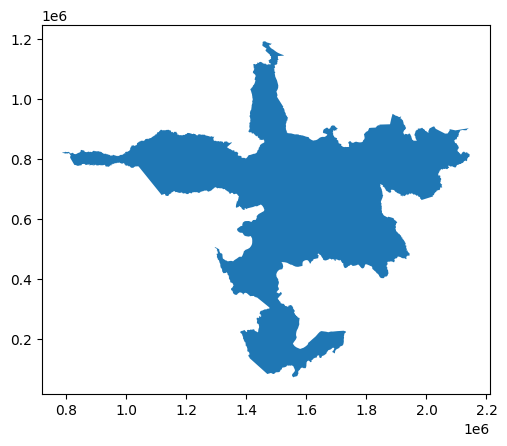

In [87]:
munisMidNS_venezuela.dissolve().overlay(munisMidWE_venezuela.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [88]:
muniMidVenezuela=munisMidNS_venezuela.dissolve().overlay(munisMidWE_venezuela.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidVenezuela

geometry  \
0  POLYGON ((1521242.622 436176.258, 1519291.216 ...   

                          ADM0_EN_1_1 ADM1_ES_1_1 ADM2_ES_1_1  \
0  Venezuela (Bolivarian Republic of)       Apure    Achaguas   

                          ADM0_EN_1_2 ADM1_ES_1_2   ADM2_ES_1_2  
0  Venezuela (Bolivarian Republic of)     Miranda  Andrés Bello

In [89]:
# some cleaning

muniMidVenezuela['zone']='middles'
muniMidVenezuelal=muniMidVenezuela.loc[:,['ADM0_EN_1_1','zone','geometry']]   
muniMidVenezuela

geometry  \
0  POLYGON ((1521242.622 436176.258, 1519291.216 ...   

                          ADM0_EN_1_1 ADM1_ES_1_1 ADM2_ES_1_1  \
0  Venezuela (Bolivarian Republic of)       Apure    Achaguas   

                          ADM0_EN_1_2 ADM1_ES_1_2   ADM2_ES_1_2     zone  
0  Venezuela (Bolivarian Republic of)     Miranda  Andrés Bello  middles

<Axes: >

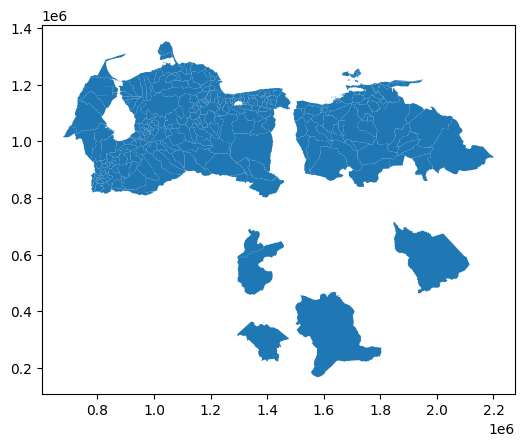

In [90]:
# with the municipalities
venezuela_municipalities.overlay(muniMidVenezuela, how='difference').plot()

<Axes: >

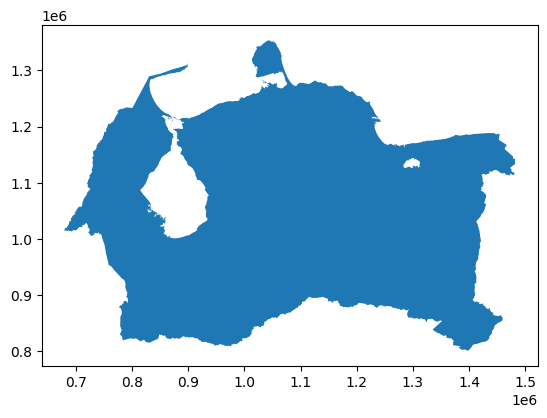

In [91]:
# with the zones
Venezuela_topLeft.overlay(muniMidVenezuela, how='difference').plot()

<Axes: >

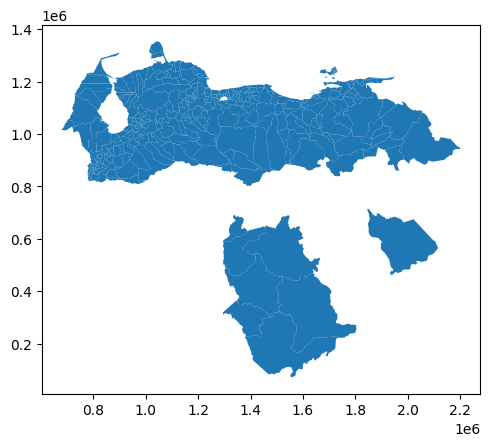

In [92]:
#Diferencia simetrica
MunisN_venezuela.overlay(MunisS_venezuela, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

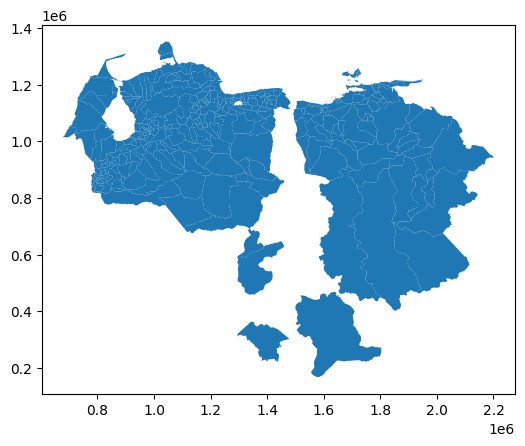

In [93]:
MunisW_venezuela.overlay(MunisE_venezuela, how="symmetric_difference",keep_geom_type=False).plot()

In [94]:
# Apply two of these operations to the next maps:

In [95]:
# hulls for the mid size airports:
Venezuela_AirTopLeft_hull=Venezuela_AirTopLeft.dissolve().convex_hull
Venezuela_AirTopRight_hull=Venezuela_AirTopRight.dissolve().convex_hull
Venezuela_AirBottomLeft_hull=Venezuela_AirBottomLeft.dissolve().convex_hull
Venezuela_AirBottomRight_hull=Venezuela_AirBottomRight.dissolve().convex_hull

<Axes: >

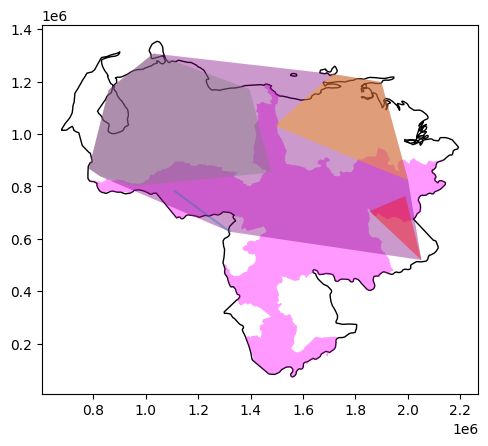

In [96]:
base = venezuela.plot(color='white', edgecolor='black') #unprojected
muniMidVenezuela.plot(ax=base,facecolor='magenta',alpha=0.4) #unprojected
MediumAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Venezuela_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Venezuela_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Venezuela_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Venezuela_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)

In [97]:
# non valid
venezuela_municipalities[~venezuela_municipalities.is_valid]

Empty GeoDataFrame
Columns: [Shape_Leng, Shape_Area, ADM2_ES, ADM2_PCODE, ADM2_REF, ADM2ALT1ES, ADM2ALT2ES, ADM1_ES, ADM1_PCODE, ADM0_EN, ADM0_ES, ADM0_PCODE, date, validOn, validTo, geometry]
Index: []

C:\Users\Enrique\AppData\Local\Temp\ipykernel_10948\4202126449.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  venezuela_municipalities[~venezuela_municipalities.is_valid].plot()


<Axes: >

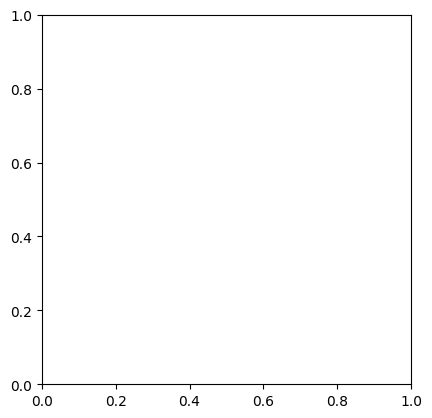

In [98]:
# see the invalid:
venezuela_municipalities[~venezuela_municipalities.is_valid].plot()

In [99]:
# what is wrong?

from shapely.validation import explain_validity, make_valid

explain_validity(venezuela_municipalities[~venezuela_municipalities.is_valid].geometry)

GeoSeries([], Name: geometry, dtype: geometry)

In [100]:
# varieties?
venezuela_municipalities['validity']=[x.split('[')[0] for x in venezuela_municipalities.geometry.apply(lambda x: explain_validity(x))]
venezuela_municipalities['validity'].value_counts()

validity
Valid Geometry    335
Name: count, dtype: int64

In [101]:
# solving the issue:
venezuela_municipalities.drop(columns=['validity'],inplace=True)

venezuela_municipalities_valid=venezuela_municipalities.copy()

venezuela_municipalities_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in venezuela_municipalities_valid['geometry'] ]
#any invalid?
venezuela_municipalities_valid[~venezuela_municipalities_valid.is_valid]

Empty GeoDataFrame
Columns: [Shape_Leng, Shape_Area, ADM2_ES, ADM2_PCODE, ADM2_REF, ADM2ALT1ES, ADM2ALT2ES, ADM1_ES, ADM1_PCODE, ADM0_EN, ADM0_ES, ADM0_PCODE, date, validOn, validTo, geometry]
Index: []

In [102]:
[x for x in venezuela_municipalities_valid["geometry"]]

[<POLYGON ((1451801.271 1177162.816, 1451931.093 1177119.789, 1452080.707 117...>,
 <POLYGON ((1206857.699 885710.71, 1206926.971 885706.669, 1207108.821 885709...>,
 <POLYGON ((1188191.216 1261541.565, 1188455.243 1261496.565, 1188930.658 126...>,
 <POLYGON ((1753284.742 1151948.209, 1753588.55 1151788.615, 1754281.343 1151...>,
 <POLYGON ((1151215.778 1076730.775, 1154304.629 1073266.845, 1156682.377 107...>,
 <POLYGON ((1736174.289 1074581.347, 1736215.697 1074576.148, 1736454.509 107...>,
 <POLYGON ((875696.659 968767.254, 876012.301 968675.09, 876207.343 968783.18...>,
 <POLYGON ((1026371.094 1004654.358, 1026696.353 1004544.477, 1027065.886 100...>,
 <MULTIPOLYGON (((868627.652 1202813.763, 868752.341 1202756.554, 868754.859 ...>,
 <POLYGON ((1653621.708 1074875.2, 1653828.411 1074878.503, 1654019.282 10749...>,
 <POLYGON ((896447.636 953766.363, 896426.352 953989.375, 896226.561 954319.4...>,
 <POLYGON ((1488814.76 1161908.324, 1488922.436 1161910.389, 1488984.305 1162...>,
 <PO

In [103]:
pd.Series([type(x) for x in venezuela_municipalities_valid.geometry]).value_counts()

<class 'shapely.geometry.polygon.Polygon'>              324
<class 'shapely.geometry.multipolygon.MultiPolygon'>     11
Name: count, dtype: int64